In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
tv_projects = utils.get_server_projects()
animals = utils.get_animals_in_project(tv_projects[1])
animals_to_remove = ['test', 'test2']
animals = [animal for animal in animals if animal not in animals_to_remove]
print(f"Animals in project {tv_projects[1]}: {animals}")
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_session_data(
        project_name=tv_projects[1],
        animal=mouse,
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

KeyboardInterrupt: 

In [4]:
utils.get_idibaps_cluster_credentials()

{'username': 'hvergara', 'host': 'mini'}

In [2]:
tv_projects = ["_", "visual_and_COT_data"]
animals = ["ACV001", "ACV002", "ACV003", "ACV004", "ACV005", "ACV006", "ACV007", "ACV008", "ACV009", "ACV010"]

In [3]:

df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

/tmp/ipykernel_507751/3584194642.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_507751/3584194642.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_507751/3584194642.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_507751/3584194642.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_507751/3584194642.py:4: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_507751/3584194642.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_507751/3584194642.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_507751/3584194642.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_507751/3584194642.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_507751/3584194642.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


In [4]:
# select only the visual easy task
df2afc = df[df['current_training_stage'] == 'TwoAFC_visual_easy']

In [5]:
df_subject_list = []
for mouse in animals:
    df_mouse = df2afc[df2afc['subject'] == mouse]
    df_session_list = []
    for session in df_mouse['session'].unique():
        df_session = df_mouse[df_mouse['session'] == session].copy()
        session_start_time = df_session['TRIAL_START'].iloc[0]
        df_session['time_from_start'] = df_session['TRIAL_START'] - session_start_time
        df_session_list.append(df_session)
    # calculate the performance
    df_mouse = pd.concat(df_session_list, ignore_index=True)
    df_mouse = dft.get_performance_through_trials(df_mouse, window=25)
    df_subject_list.append(df_mouse)

df2afc = pd.concat(df_subject_list, ignore_index=True)

In [6]:
# select only the trials with a performance above 0.75
# TODO: fix this so that this applies to the entire session
df2afc = df2afc[df2afc['performance_w'] > 75]

## ITI analysis

In [7]:
df2afc = dft.add_inter_trial_interval_column_to_df(df2afc)

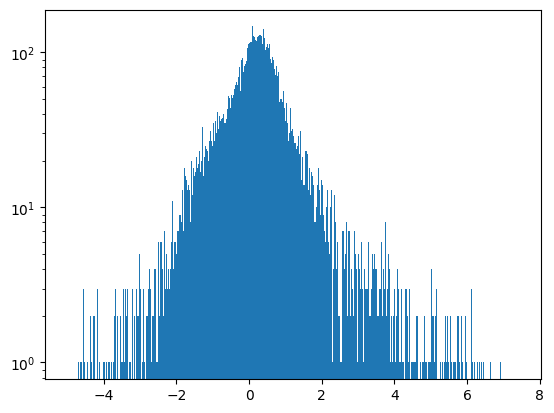

In [8]:
plt.hist(np.log(df2afc['inter_trial_interval']), bins=10000)
# plt.xlim(0, 15)
plt.yscale('log')
plt.show()

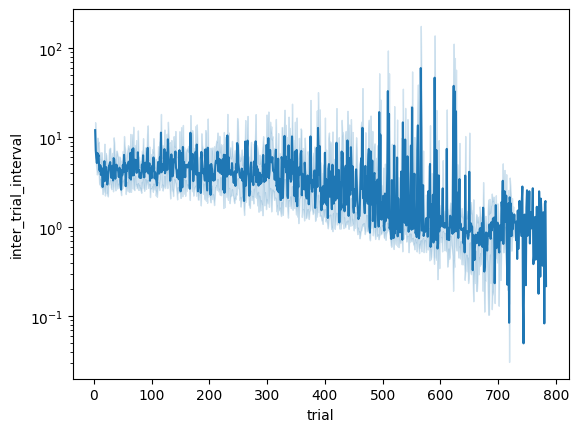

In [9]:
# iti vs trial number
sns.lineplot(data=df2afc, x='trial', y='inter_trial_interval')
plt.yscale('log')
plt.show()

In [10]:
# why does iti decrease with trial number? number of pokes in port2?
df2afc["port2_holds"] = df2afc.apply(lambda row: utils.get_trial_port_hold(row, 2), axis=1)
df2afc["port2_holds_number"] = df2afc.port2_holds.apply(len)

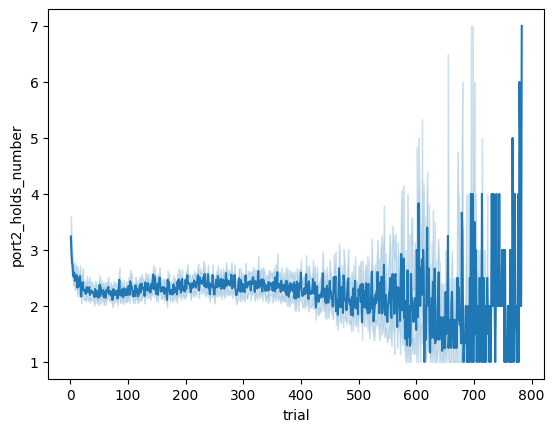

In [11]:
sns.lineplot(data=df2afc, x='trial', y='port2_holds_number')
plt.show()

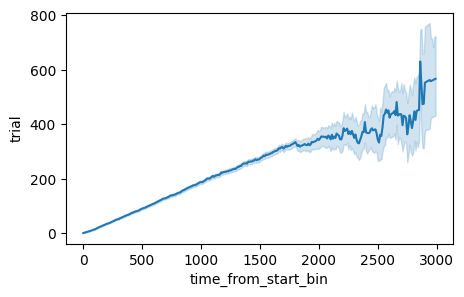

In [12]:
# engagement over the session
df2afc["time_from_start_bin"] = df2afc["time_from_start"] // 10 * 10
df2afc_cumulative = df2afc.groupby(["time_from_start_bin", "date"])["trial"].max().reset_index()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
sns.lineplot(data=df2afc_cumulative, x='time_from_start_bin', y='trial', ax=axs)
plt.show()

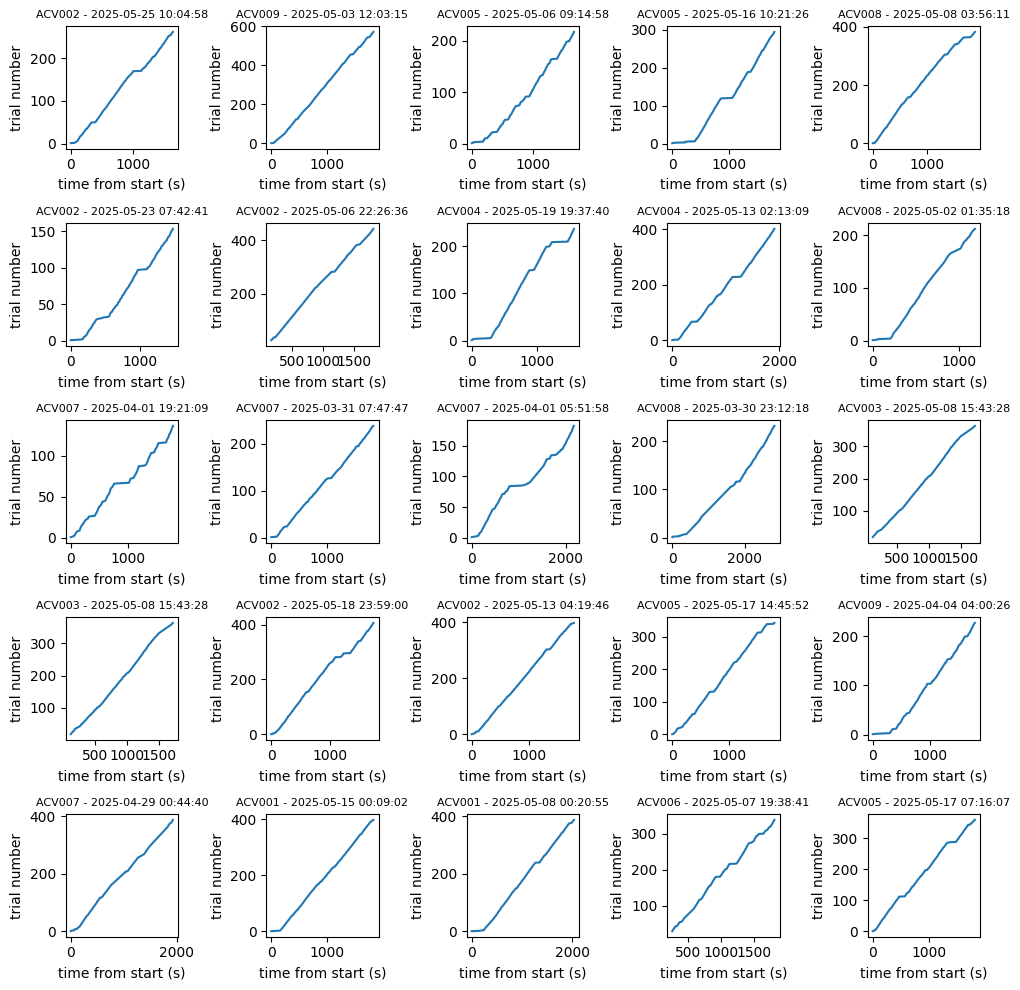

In [13]:
# select random sessions to plot this, with a minimum of 100 trials
df2afc_sessions = df2afc.groupby(['subject', 'session']).filter(lambda x: len(x) > 100)
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10,10))
axs = axs.flatten()
for i in range(len(axs)):
    # select a random subject and session
    subject = np.random.choice(df2afc_sessions['subject'].unique())
    session = np.random.choice(df2afc_sessions[df2afc_sessions['subject'] == subject]['session'].unique())
    session_data = df2afc_sessions[(df2afc_sessions['subject'] == subject) & (df2afc_sessions['session'] == session)]

    sns.lineplot(data=session_data, x='time_from_start', y='trial', ax=axs[i])
    axs[i].set_title(f"{subject} - {session_data['date'].iloc[0]}", fontsize=8)
    axs[i].set_xlabel('time from start (s)')
    axs[i].set_ylabel('trial number')

plt.tight_layout()
plt.show()

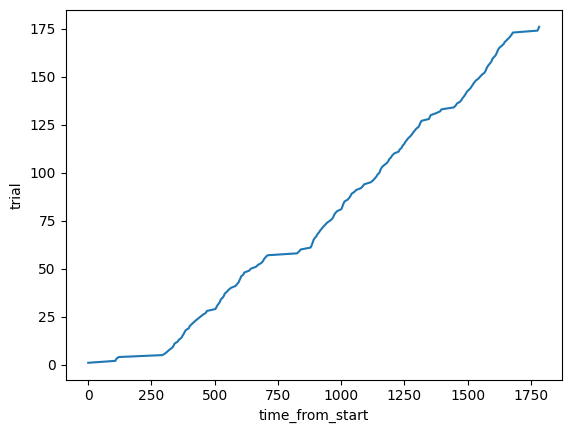

In [14]:
mouse = "ACV008"
date = "2025-04-04 12:04:52"

# select the data for the specific mouse and date
df_mouse = df2afc[(df2afc['subject'] == mouse) & (df2afc['date'] == date)]

sns.lineplot(data=df_mouse, x='time_from_start', y='trial')
plt.show()

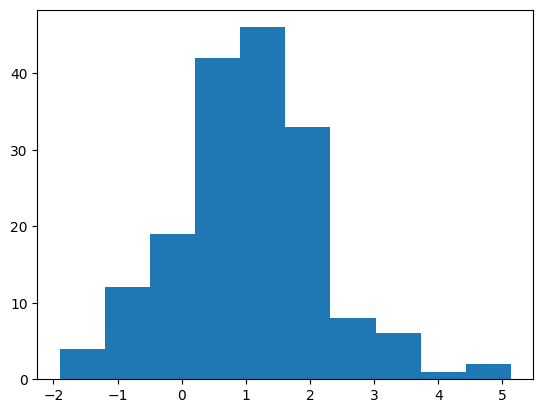

In [15]:
plt.hist(np.log(df_mouse['inter_trial_interval']))
# plt.yscale('log')
plt.show()

In [16]:
# get the median and std of the log of the inter_trial_interval
df_mouse['iti_log'] = np.log(df_mouse['inter_trial_interval'])
median_iti_log = df_mouse['iti_log'].median()
std_iti_log = df_mouse['iti_log'].std()

# classify trials as engaged or not engaged depending on the iti_log
df_mouse['engaged'] = df_mouse['iti_log'] < (median_iti_log + 2 * std_iti_log)

/tmp/ipykernel_507751/1372161275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['iti_log'] = np.log(df_mouse['inter_trial_interval'])
/tmp/ipykernel_507751/1372161275.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['engaged'] = df_mouse['iti_log'] < (median_iti_log + 2 * std_iti_log)


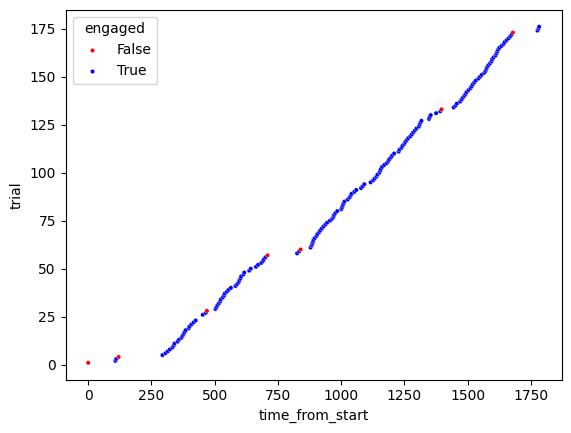

In [17]:
sns.scatterplot(data=df_mouse, x='time_from_start', y='trial', hue='engaged', palette={True: 'blue', False: 'red'}, s=10)
plt.show()

In [18]:
# add trial duration
df_mouse = dft.add_trial_duration_column_to_df(df_mouse)

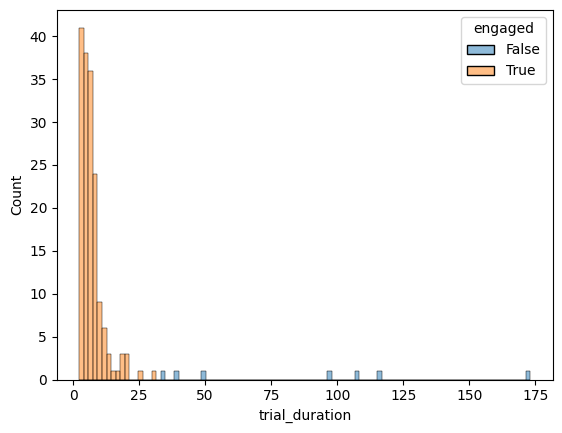

In [19]:
sns.histplot(data=df_mouse, x='trial_duration', bins=100, hue='engaged')
plt.show()


In [ ]:
# divide the session time into:
# - engaged
# - disengaged
# - time to complete the first trial
# - time from last trial to leave the box

# the end of the session is stored in a different dataset: session_summary

In [ ]:
# retrive the session summary data
# download the session data
utils.rsync_sessions_summary(
    project_name=tv_projects[1],
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)


receiving incremental file list


KeyboardInterrupt: 

rsync error: unexplained error (code 255) at rsync.c(716) [Receiver=3.2.7]
rsync: [Receiver] write error: Broken pipe (32)


In [20]:
sessions_summary_df = pd.read_csv(local_path / Path('sessions_summary.csv'), sep=';')

In [21]:
from datetime import datetime

def get_session_box_usage_complete(session_df: pd.DataFrame, sessions_summary_df: pd.DataFrame) -> dict:

    if session_df.date.unique().size != 1:
        raise ValueError("Session dataframe must contain data for a single date.")

    #TODO: do the column checker

    date = session_df.date.unique()[0]
    date_timestamp = datetime.strptime(date, "%Y-%m-%d %H:%M:%S").timestamp() + 3600
    session_duration = sessions_summary_df[sessions_summary_df['date'] == date].duration.values[0]
    time_to_complete_first_trial = session_df.iloc[0].trial_duration
    start_of_first_trial = session_df.iloc[0].TRIAL_START
    time_to_complete_last_trial = session_df.iloc[-1].TRIAL_END - start_of_first_trial
    time_to_exit_box = session_duration - time_to_complete_last_trial

    session_duration_as_sum_of_trials = session_df['trial_duration'].sum()

    session_duration_as_dif_last_from_first = session_df['TRIAL_END'].iloc[-1] - session_df['TRIAL_START'].iloc[0]

    # add the time of engagement and disengagement, removing the first trial
    session_df = session_df.iloc[1:]  # remove the first trial for engagement calculation
    engaged_time = session_df[session_df['engaged']]['trial_duration'].sum()
    disengaged_time = session_df[~session_df['engaged']]['trial_duration'].sum()

    start_time_dif = start_of_first_trial - date_timestamp

    return {
        "date": date,
        "time_to_complete_first_trial": time_to_complete_first_trial,
        "time_to_exit_box": time_to_exit_box,
        "engaged_time": engaged_time,
        "disengaged_time": disengaged_time,
        "session_duration": session_duration,
        "all_adds_up_to": (
            time_to_complete_first_trial +
            time_to_exit_box +
            engaged_time +
            disengaged_time
        ),
        "start_time_dif": start_time_dif,
        "session_duration_as_sum_of_trials": session_duration_as_sum_of_trials,
        "session_duration_as_dif_last_from_first": session_duration_as_dif_last_from_first,

    }

get_session_box_usage_complete(df_mouse, sessions_summary_df)

{'date': '2025-04-04 12:04:52',
 'time_to_complete_first_trial': 107.34159994125366,
 'time_to_exit_box': 12.378149175644012,
 'engaged_time': 1153.5478987693787,
 'disengaged_time': 508.4839997291565,
 'session_duration': 1800.7125,
 'all_adds_up_to': 1781.7516476154328,
 'start_time_dif': 0.8536710739135742,
 'session_duration_as_sum_of_trials': 1769.3734984397888,
 'session_duration_as_dif_last_from_first': 1788.334350824356}

In [22]:
def test_session_delta(session_df: pd.DataFrame, sessions_summary_df: pd.DataFrame) -> float:

    if session_df.date.unique().size != 1:
        raise ValueError("Session dataframe must contain data for a single date.")

    #TODO: do the column checker

    date = session_df.date.unique()[0]
    date_timestamp = datetime.strptime(date, "%Y-%m-%d %H:%M:%S").timestamp()
    last_trial_end = session_df['TRIAL_END'].iloc[-1]
    session_duration = last_trial_end - date_timestamp
    actual_session_duration = sessions_summary_df[sessions_summary_df['date'] == date].duration.values[0]

    return session_duration - actual_session_duration

list_of_deltas = []
for date in df2afc['date'].unique():
    df_mouse = df2afc[df2afc['date'] == date]
    delta = test_session_delta(df_mouse, sessions_summary_df)
    list_of_deltas.append(delta)

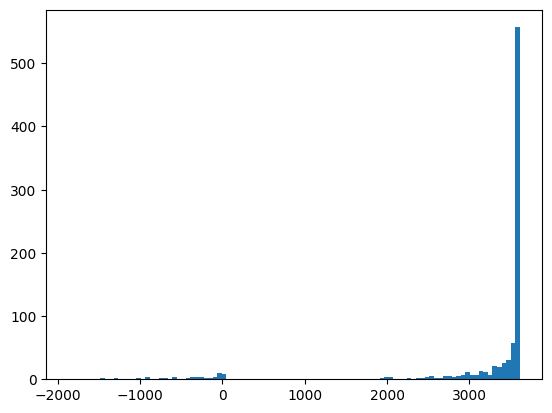

In [23]:
plt.hist(list_of_deltas, bins=100)
plt.show()

In [24]:
sessions_summary_df['date'] = pd.to_datetime(sessions_summary_df['date'], format='%Y-%m-%d %H:%M:%S')

In [25]:
engagement_sd_criteria = 2
df2afc = df[df['current_training_stage'] == 'TwoAFC_visual_easy']
df2afc = dft.add_trial_duration_column_to_df(df2afc)
df2afc = dft.add_inter_trial_interval_column_to_df(df2afc)
iti_vals_dict = {
    'subject': [],
    'median_iti_log': [],
    'std_iti_log': [],
}
for subject in df2afc['subject'].unique():
    df_mouse = df2afc[df2afc['subject'] == subject]
    # get the median and std of the log of the inter_trial_interval
    df_mouse['iti_log'] = np.log(df_mouse['inter_trial_interval'])
    median_iti_log = df_mouse['iti_log'].median()
    std_iti_log = df_mouse['iti_log'].std()

    # store the median and std in the iti_vals_dict
    iti_vals_dict['subject'].append(subject)
    iti_vals_dict['median_iti_log'].append(median_iti_log)
    iti_vals_dict['std_iti_log'].append(std_iti_log)

    # classify trials as engaged or not engaged depending on the iti_log
    df_mouse['engaged'] = df_mouse['iti_log'] < (median_iti_log + engagement_sd_criteria * std_iti_log)

    df2afc.loc[df2afc['subject'] == subject, 'engaged'] = df_mouse['engaged']

/tmp/ipykernel_507751/2437400956.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['iti_log'] = np.log(df_mouse['inter_trial_interval'])
/tmp/ipykernel_507751/2437400956.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['engaged'] = df_mouse['iti_log'] < (median_iti_log + engagement_sd_criteria * std_iti_log)
/tmp/ipykernel_507751/2437400956.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [26]:
iti_vals_df = pd.DataFrame(iti_vals_dict)

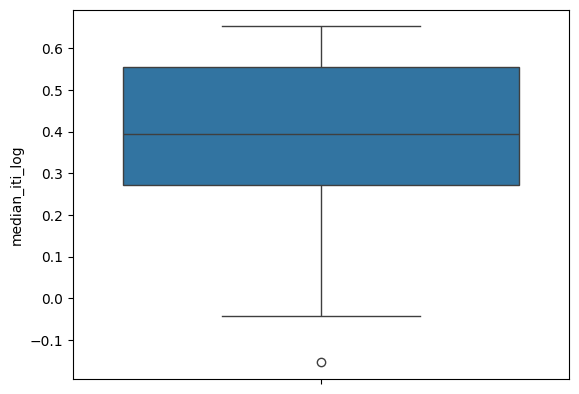

In [27]:
sns.boxplot(data=iti_vals_df, y='median_iti_log')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_507751/3766995786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['iti_log'] = np.log(df_mouse['inter_trial_interval'])
/tmp/ipykernel_507751/3766995786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['iti_log'] = np.log(df_mouse['inter_trial_interval'])
/tmp/ipykernel_507751/3766995786.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

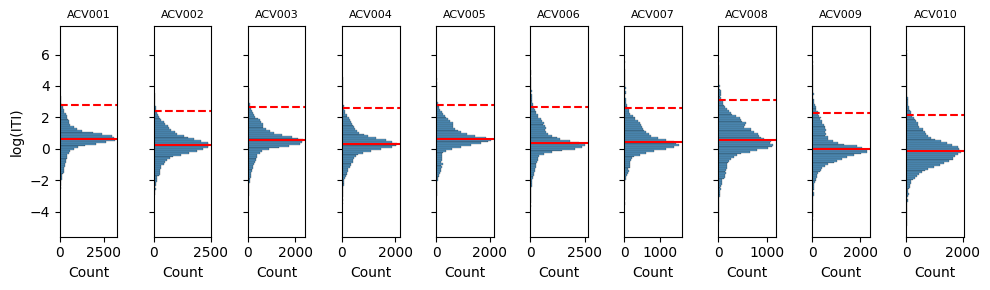

In [28]:
fig, axs = plt.subplots(ncols=len(df2afc.subject.unique()), nrows=1, figsize=(10, 3), sharey=True)
axs = axs.ravel()
for i, subject in enumerate(df2afc.subject.unique()):
    df_mouse = df2afc[df2afc['subject'] == subject]
    df_mouse['iti_log'] = np.log(df_mouse['inter_trial_interval'])
    sns.histplot(data=df_mouse, y='iti_log', ax=axs[i], bins=100)
    # horizontal line at the median
    median_iti_log = df_mouse['iti_log'].median()
    std_iti_log = df_mouse['iti_log'].std()
    axs[i].axhline(median_iti_log, color='red', linestyle='-')
    axs[i].axhline(median_iti_log + engagement_sd_criteria * std_iti_log, color='red', linestyle='--')
    # axs[i].axhline(median_iti_log - engagement_sd_criteria * std_iti_log, color='red', linestyle='--')
    axs[i].set_title(subject, fontsize=8)
    axs[i].set_ylabel('log(ITI)')
plt.tight_layout()
plt.show()

In [29]:
# TODO: check these differences per mouse between day and night
def is_day_session(date: str) -> bool:
    """
    Check if the session is a day session based on the date.
    """
    hour = int(date.split(" ")[1].split(":")[0])
    return 8 <= hour < 19  # Daytime is considered from 8 AM to 8 PM

In [30]:
df2afc['day_session'] = df2afc['date'].apply(is_day_session)

/tmp/ipykernel_507751/1076269739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['iti_log'] = np.log(df_mouse['inter_trial_interval'])
/tmp/ipykernel_507751/1076269739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mouse['iti_log'] = np.log(df_mouse['inter_trial_interval'])
/tmp/ipykernel_507751/1076269739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

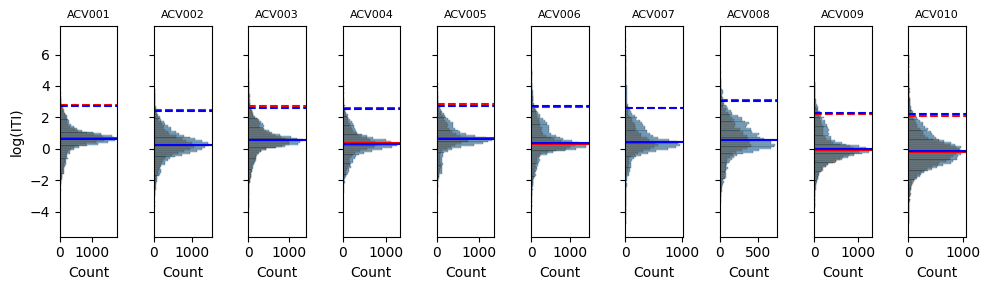

In [33]:
fig, axs = plt.subplots(ncols=len(df2afc.subject.unique()), nrows=1, figsize=(10, 3), sharey=True)
axs = axs.ravel()
for i, subject in enumerate(df2afc.subject.unique()):
    df_mouse = df2afc[df2afc['subject'] == subject]
    df_mouse['iti_log'] = np.log(df_mouse['inter_trial_interval'])
    sns.histplot(data=df_mouse, y='iti_log', hue='day_session', ax=axs[i], bins=100)
    # horizontal line at the median
    median_iti_log_day = df_mouse[df_mouse['day_session']]['iti_log'].median()
    median_iti_log_night = df_mouse[~df_mouse['day_session']]['iti_log'].median()
    std_iti_log_day = df_mouse[df_mouse['day_session']]['iti_log'].std()
    std_iti_log_night = df_mouse[~df_mouse['day_session']]['iti_log'].std()
    axs[i].axhline(median_iti_log_day, color='red', linestyle='-')
    axs[i].axhline(median_iti_log_day + engagement_sd_criteria * std_iti_log_day, color='red', linestyle='--')
    axs[i].axhline(median_iti_log_night, color='blue', linestyle='-')
    axs[i].axhline(median_iti_log_night + engagement_sd_criteria * std_iti_log_night, color='blue', linestyle='--')
    axs[i].set_title(subject, fontsize=8)
    axs[i].set_ylabel('log(ITI)')
    # remove legend
    axs[i].get_legend().remove()

plt.tight_layout()
plt.show()

In [34]:
def get_session_box_usage(session_df: pd.DataFrame, sessions_summary_df: pd.DataFrame) -> pd.DataFrame:

    if session_df.date.unique().size != 1:
        raise ValueError("Session dataframe must contain data for a single date.")

    #TODO: do the column checker

    date = session_df.date.unique()[0]
    subject = session_df.subject.unique()[0]
    session_duration = sessions_summary_df[sessions_summary_df['date'] == date].duration.values[0]
    time_to_complete_first_trial = session_df.iloc[0].trial_duration
    start_of_first_trial = session_df.iloc[0].TRIAL_START
    last_trial_completed_time = session_df.iloc[-1].TRIAL_END - start_of_first_trial
    time_to_exit_box = session_duration - last_trial_completed_time
    # add accuracy as well
    accuracy = session_df['correct'].mean() * 100

    # add the time of engagement and disengagement, removing the first trial
    session_df = session_df.iloc[1:]  # remove the first trial for engagement calculation
    engaged_time = session_df[session_df['engaged'] == True]['trial_duration'].sum()
    disengaged_time = session_df[session_df['engaged'] == False]['trial_duration'].sum()

    unaccounted_time = session_duration - (time_to_complete_first_trial + time_to_exit_box +
                                           engaged_time + disengaged_time)
    
    total_session_time = time_to_complete_first_trial + time_to_exit_box + engaged_time + disengaged_time + unaccounted_time

    return pd.DataFrame({
        "date": [date] * 5,
        "subject": [subject] * 5,
        "time_type": [
            "time_to_complete_first_trial",
            "time_to_exit_box",
            "engaged_time",
            "disengaged_time",
            "unaccounted_time"
        ],
        "absolute_time": [
            time_to_complete_first_trial,
            time_to_exit_box,
            engaged_time,
            disengaged_time,
            unaccounted_time
        ],
        "percentage_of_time": [
            time_to_complete_first_trial / total_session_time * 100,
            time_to_exit_box / total_session_time * 100,
            engaged_time / total_session_time * 100,
            disengaged_time / total_session_time * 100,
            unaccounted_time / total_session_time * 100
        ],
        "accuracy": [accuracy] * 5,
    })

gsbu_dfs = []
for date in df2afc['date'].unique():
    df_session = df2afc[df2afc['date'] == date]
    gsbu_dfs.append(get_session_box_usage(df_session, sessions_summary_df))
gsbu_df = pd.concat(gsbu_dfs, ignore_index=True)

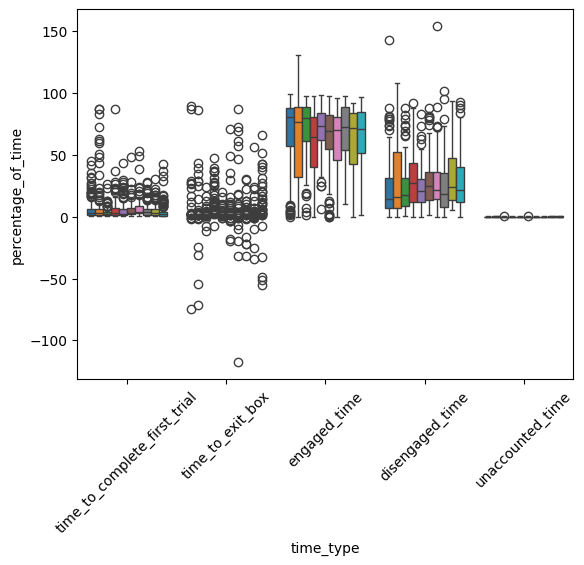

In [35]:
sns.boxplot(data=gsbu_df, x='time_type', y='percentage_of_time', hue='subject')
plt.xticks(rotation=45)
# remove legend
plt.legend([],[], frameon=False)
# plt.yscale('log')
plt.show()

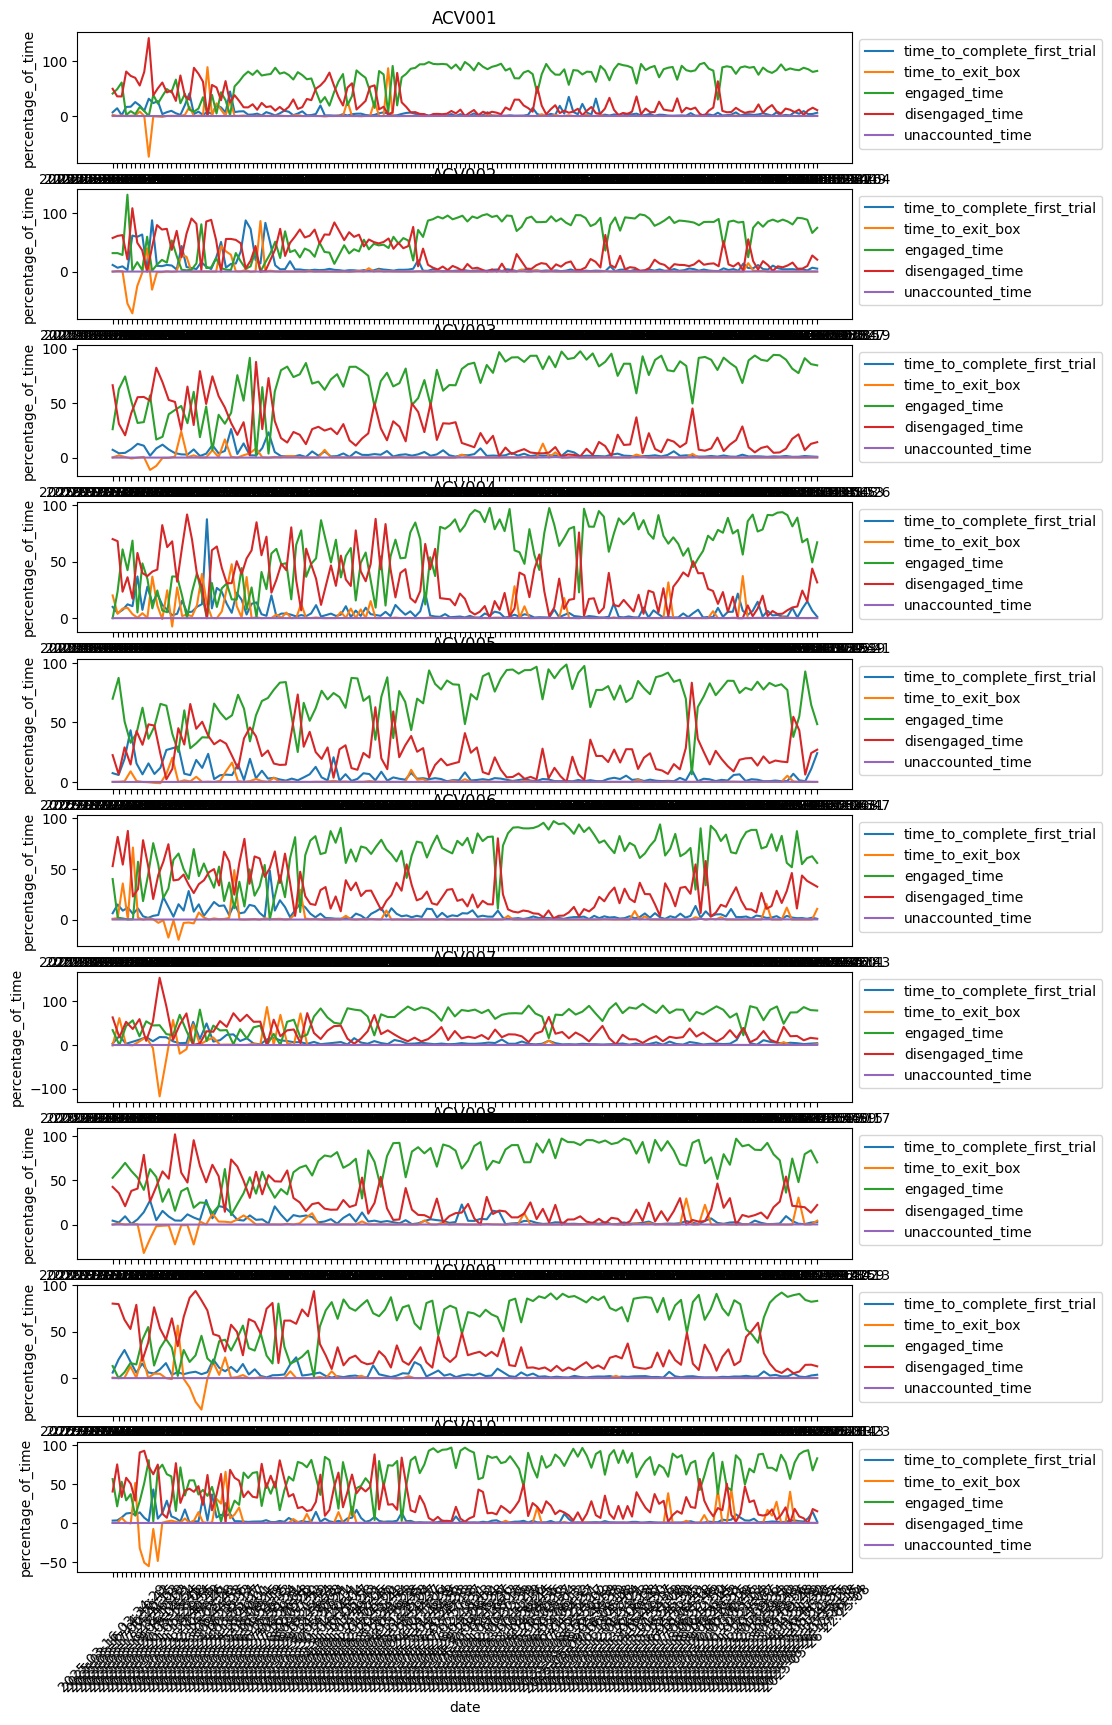

In [36]:
# plot this for each subject
fig, axs = plt.subplots(nrows=len(gsbu_df.subject.unique()), ncols=1, figsize=(10,20))
axs = axs.ravel()
for i, sel_sub in enumerate(gsbu_df.subject.unique()):
    gsbu_df_sel = gsbu_df[gsbu_df['subject'] == sel_sub]
    axs[i].set_title(sel_sub)
    sns.lineplot(data=gsbu_df_sel, x='date', y='percentage_of_time', hue='time_type', ax=axs[i])
    plt.xticks(rotation=45)
    # show legend on the right outside the plot
    axs[i].legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

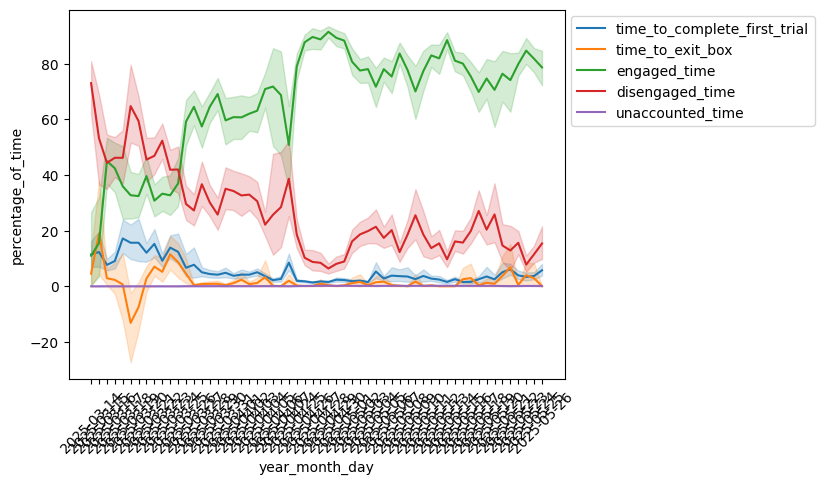

In [37]:
# show the mean
gsbu_df = dft.add_day_column_to_df(gsbu_df)
# sort by date
gsbu_df = gsbu_df.sort_values(by='year_month_day')
sns.lineplot(data=gsbu_df, x='year_month_day', y='percentage_of_time', hue='time_type', estimator='mean')
plt.xticks(rotation=45)
# legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

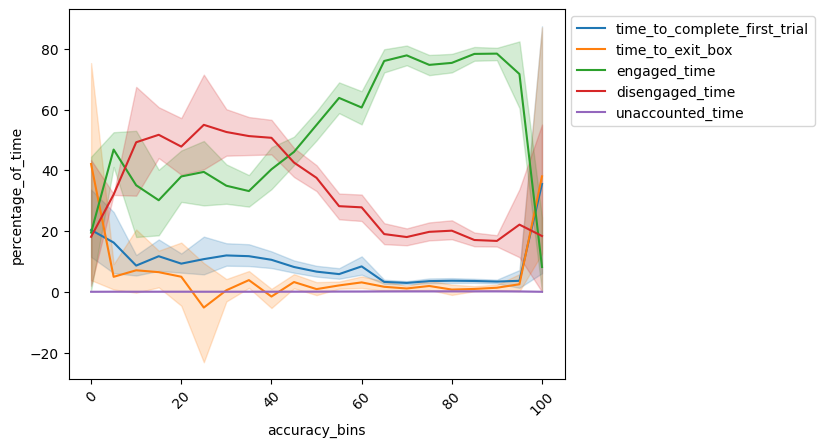

In [38]:
# same but match to accuracy
gsbu_df["accuracy_bins"] = gsbu_df["accuracy"] // 5 * 5
sns.lineplot(data=gsbu_df, x='accuracy_bins', y='percentage_of_time', hue='time_type', estimator='mean')
plt.xticks(rotation=45)
# legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [39]:
# look for differences between day and night sessions!!!
gsbu_df["is_day_session"] = gsbu_df["date"].apply(is_day_session)

In [40]:
gsbu_df.is_day_session.value_counts()

is_day_session
False    3690
True     2880
Name: count, dtype: int64

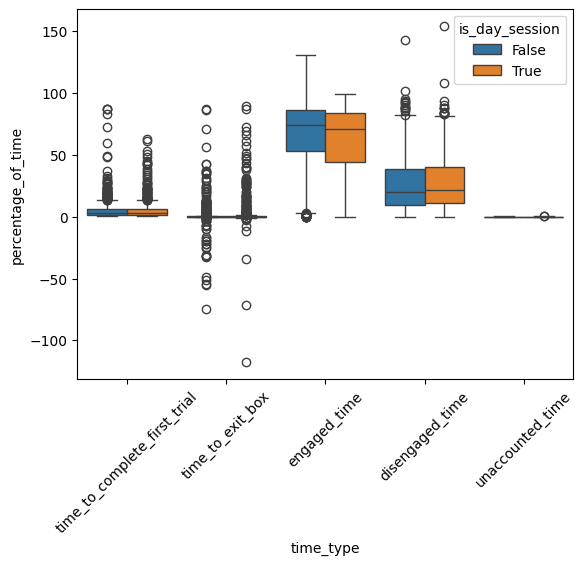

In [41]:
sns.boxplot(data=gsbu_df, x='time_type', y='percentage_of_time', hue='is_day_session')
plt.xticks(rotation=45)
plt.show()

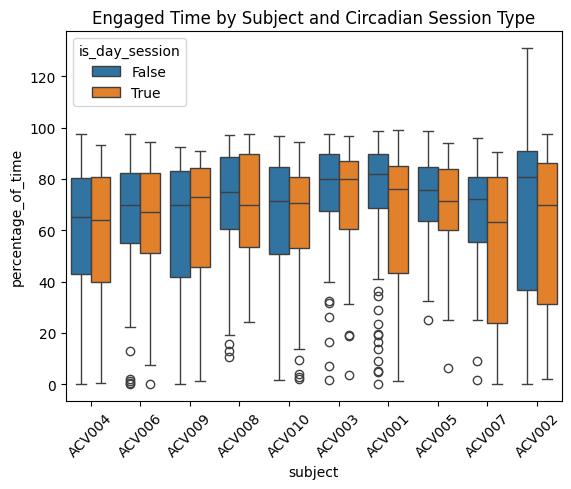

In [42]:
# compare the engaged time across day and night sessions per subject
# for engaged time only:
sns.boxplot(data=gsbu_df[gsbu_df['time_type'] == 'engaged_time'], x='subject', y='percentage_of_time', hue='is_day_session')
plt.xticks(rotation=45)
plt.title('Engaged Time by Subject and Circadian Session Type')
plt.show()

In [43]:
# show it as a mean per animal once the accuracy is high
gsbu_df_sel = gsbu_df[(65 < gsbu_df['accuracy']) & (gsbu_df['accuracy'] < 95)]
gsbu_df_sel_gb = gsbu_df_sel.groupby(['subject', 'is_day_session' , 'time_type'])["percentage_of_time"].mean().reset_index()

In [44]:
gsbu_df_sel_gb.time_type.unique()

array(['disengaged_time', 'engaged_time', 'time_to_complete_first_trial',
       'time_to_exit_box', 'unaccounted_time'], dtype=object)

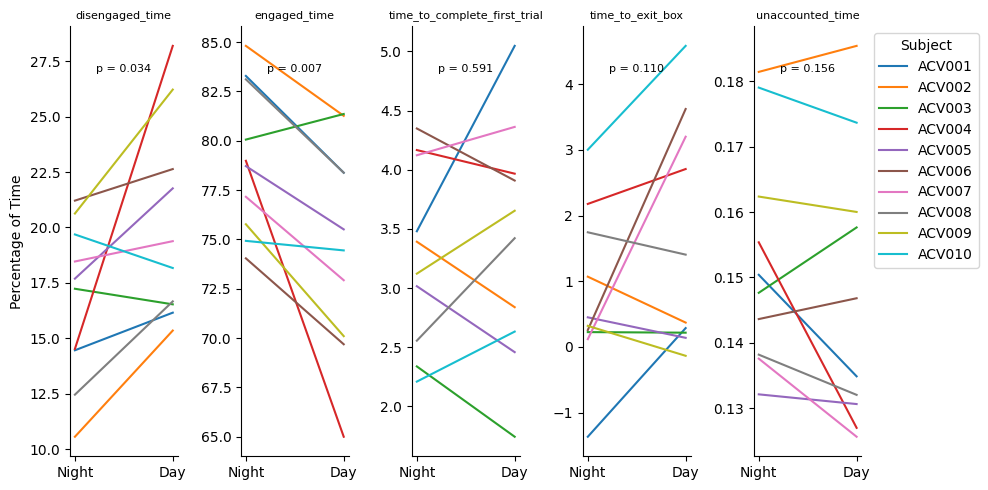

In [49]:
from scipy.stats import ttest_rel
fig, axs = plt.subplots(ncols=len(gsbu_df_sel_gb.time_type.unique()), nrows=1, figsize=(10,5))
axs = axs.ravel()
for i, time_type in enumerate(gsbu_df_sel_gb['time_type'].unique()):
    tt_df = gsbu_df_sel_gb[gsbu_df_sel_gb['time_type'] == time_type]
    sns.lineplot(data=tt_df, x="is_day_session", y="percentage_of_time", hue="subject", estimator=None, marker="", ax=axs[i])
    axs[i].set_title(time_type, fontsize=8)
    axs[i].set_xticks([0, 1], ["Night", "Day"])
    # remove legend
    axs[i].legend([],[], frameon=False)
    axs[i].set_ylabel("")
    axs[i].set_xlabel("")
    # add stats
    day_values = tt_df[tt_df["is_day_session"] == True]["percentage_of_time"].values
    night_values = tt_df[tt_df["is_day_session"] == False]["percentage_of_time"].values
    _, p_value = ttest_rel(night_values, day_values)
    axs[i].text(0.5, 0.9, f'p = {p_value:.3f}', transform=axs[i].transAxes, ha='center', va='center', fontsize=8)
    # despine
    sns.despine(ax=axs[i])  # add despine for better aesthetics
axs[0].set_ylabel("Percentage of Time")
plt.legend(title="Subject", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

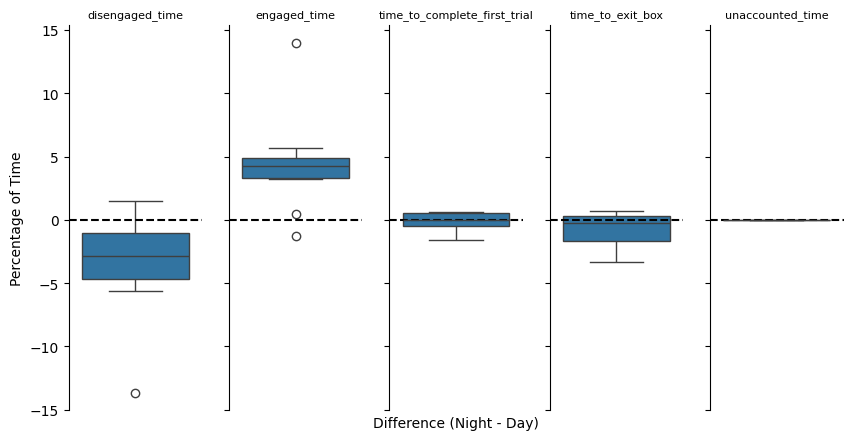

In [50]:
# plot it as the difference between day and night sessions
fig, axs = plt.subplots(ncols=len(gsbu_df_sel_gb.time_type.unique()), nrows=1, figsize=(10,5), sharey=True)
axs = axs.ravel()
for i, time_type in enumerate(gsbu_df_sel_gb['time_type'].unique()):
    tt_df = gsbu_df_sel_gb[gsbu_df_sel_gb['time_type'] == time_type]
    # get the difference between day and night sessions per mouse
    difs = []
    for subject in tt_df['subject'].unique():
        day_value = tt_df[(tt_df['is_day_session'] == True) & (tt_df['subject'] == subject)]['percentage_of_time'].values[0]
        night_value = tt_df[(tt_df['is_day_session'] == False) & (tt_df['subject'] == subject)]['percentage_of_time'].values[0]
        difs.append(- day_value + night_value)
    sns.boxplot(data=pd.DataFrame({'difference': difs}), y='difference', ax=axs[i])
    axs[i].set_title(time_type, fontsize=8)
    axs[i].set_ylabel("Percentage of Time")
    # despine
    sns.despine(ax=axs[i])  # add despine for better aesthetics
    axs[i].set_xticks([])  # remove x-ticks
    axs[i].set_xlabel("")  # remove x-label
    # remove x line
    axs[i].spines['bottom'].set_visible(False)
    # horizontal line at 0
    axs[i].axhline(0, color='black', linestyle='--')
axs[2].set_xlabel("Difference (Night - Day)")

plt.show()


In [47]:
gsbu_df_sel_gb

,subject,is_day_session,time_type,percentage_of_time
0,ACV001,False,disengaged_time,14.456826
1,ACV001,False,engaged_time,83.280553
2,ACV001,False,time_to_complete_first_trial,3.479796
3,ACV001,False,time_to_exit_box,-1.367582
4,ACV001,False,unaccounted_time,0.150406
...,...,...,...,...
95,ACV010,True,disengaged_time,18.170506
96,ACV010,True,engaged_time,74.440361
97,ACV010,True,time_to_complete_first_trial,2.631613
98,ACV010,True,time_to_exit_box,4.583866
